In [2]:
using StaticArrays, DifferentialEquations, DynamicalSystems, CairoMakie

In [3]:
function sigma(x)
    return 1.0 / ( 1.0 + exp( -10.0 * ( x  - ( - 0.25 ) ) ) )
end

function HR(u, p, t)
        
    a, b, c, d, s, xr, r,  I, vs, chem_link, el_link  = p
    x1, y1, z1, x2, y2, z2 = u
    
    du1 = y1 + b * x1 ^ 2 - a * x1 ^3 - z1 + I - chem_link * ( x1 - vs ) * sigma(x2) + el_link * ( x2 - x1 )
    du2 = c - d * x1 ^2 - y1
    du3 = r * ( s * ( x1 - xr ) - z1 )
    
    du4 = y2 + b * x2 ^ 2 - a * x2 ^3 - z2 + I - chem_link * ( x2 - vs ) * sigma(x1) + el_link * ( x1 - x2 )
    du5 = c - d * x2 ^2 - y2
    du6 = r * ( s * ( x2 - xr ) - z2 )
    return SVector(du1, du2, du3,
                    du4, du5, du6)
end

HR (generic function with 1 method)

In [4]:
a = 1.0; b = 3.0; c = 1.0; d = 5.0; xr = -1.6; r = 0.01; s = 5.0; I = 4.0; xv = 2.0

chemical_link = -0.02; electrical_link = 0.01

u0 = SA[-2.5, 0.0, 0.0, -1.5, 0.0, 0.0]
p = SA[a, b, c, d, s, xr, r, I, xv, chemical_link, electrical_link]

time = 5000.0; Tt = 10000.0; tstep = 0.01

setting_integrator = ( alg = Vern9(), adaptive = false, dt = tstep );

In [17]:
ch_link = range(-0.02, 0.056, length = 500)
λs = zeros(length(ch_link), dimension(ds)); u0s = λs;

In [5]:
ds =  ContinuousDynamicalSystem( HR, u0, p)

6-dimensional continuous dynamical system
 state:       [-2.5, 0.0, 0.0, -1.5, 0.0, 0.0]
 rule f:      HR
 in-place?    false
 jacobian:    ForwardDiff
 parameters:  [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, -0.02, 0.01]

In [ ]:
for (idx, p) in enumerate(ch_link)
    
end

In [6]:
he = Systems.henon()
as = 0.8:0.005:1.225; λs = zeros(length(as), 2)
for (i, a) in enumerate(as)
    set_parameter!(he, 1, a)
    λs[i, :] .= lyapunovspectrum(he, 10000; Ttr = 500)
end

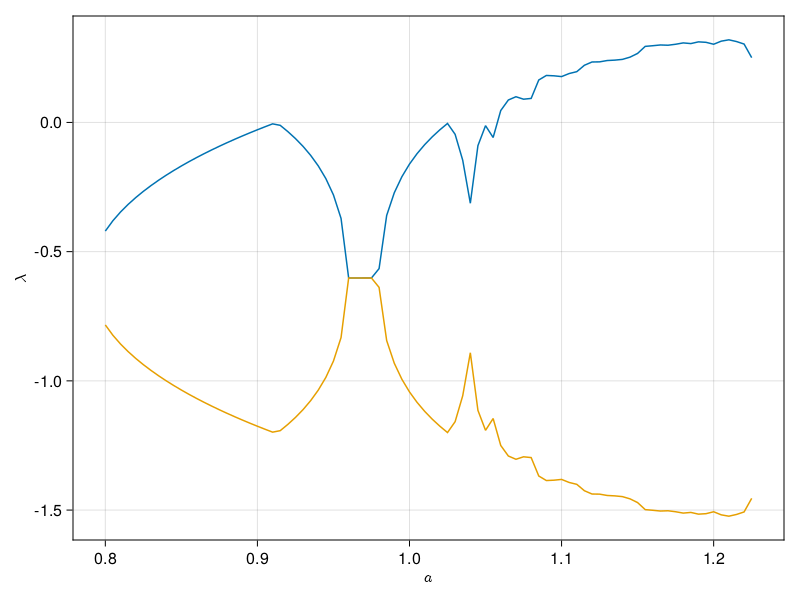

In [7]:
fig = Figure()
ax = Axis(fig[1,1]; xlabel = L"a", ylabel = L"\lambda")
for j in 1:2
    lines!(ax, as, λs[:, j])
end
fig